# 一、项目背景
本数据报告以淘宝app平台为数据集，通过行业的指标对淘宝用户行为进行分析，从而探索淘宝用户的行为模式，具体指标包括：日PV和日UV分析，付费率分析，复购行为分析，漏斗流失分析和用户价值RFM分析。

# 二、 source
https://zhuanlan.zhihu.com/p/55244488

# 三、 goal
1.日PV有多少

2.日UV有多少

3.付费率情况如何

4.复购率是多少

5漏斗流失情况如何

6.用户价值情况

## 名词解释：
### 日PV和日UV分析
1. 播放类指标
* VV(Video View，播放数)，是指在一个统计周期内，视频被打开的次数之和。
* CV(Content Views，内容播放数)，是指在一个统计周期内，视频被打开，且视频正片内容（除广告）被成功播放的次数之和。由于用户在广告播放的时候流失，所以CV＜VV。

2. 浏览类指标

* PV(Page View，浏览量)，是指在一个统计周期内，浏览页面的数之和。
PV的统计方式很容易理解，通常会将来自浏览器的一次HTML内容请求计算为一次PV；
* UV(Unique Visitor，访客数)，是指在一个统计周期内，访问网站的人数之和。
在网站分析系统中，会依据用户的浏览器、设备型号等信息，为用户分配一个编号(Cookie，若一用户换了浏览器和设备，cook
                                     ie会随之变化)，访客数就是访问网站的Cookie数量。
* IP（Internet Protocol）独立IP，指独立IP数。00:00-24:00内相同IP地址之被计算一次。

### 复购率
1. 按时间分
* 绝对时间复购率：上一周期的用户在下一周期的购买客户数比例，如8月ab共100万，9月复购ab50万，则8月用户次月复购率为50%，分析时可以将上一周期的用户按照下单时的状态分层，如8月新客、8月老客等，分层的维度应该和实际运营时有差异化运营策略或人群有明显属性差异的人群维度拉齐
* 相对时间复购率：每一群同一时点下单的用户在未来一段时间内再次下单的比例，如8月ab共100万，他们在下单后的7天内再次下单的ab20万，则8月用户7天复购率20%，分层思路同上
2. 用户划分：
* 老客复购率：统计周期开始前已经是平台老客的用户在未来N天或下个周期的复购
* 新客复购率：首单发生在统计周期内的用户在未来N天或下个周期的复购
* 分层复购率：根据业务需求进行用户个性化分层，并监控各分层用户的复购
3. 复购率=复访率×转化率
* 复访率影响因素：
用户质量， 季节性， 营销召回， 促回访
* 转化率影响因素：
用户质量、季节性等因素，货和场，促转化玩法。
* 复购率提升策略
#### 电商三要素
电商三要素人、货、场，运营的价值是根据“人”的需求，合理的创造和组合“货”和“场”的元素，其中货是用户价值述求的核心所在，也是构成场的基本元素，场是将货以高效的形式激发和满足用户需求的呈现逻辑和表现形式。

https://www.woshipm.com/operate/5162535.html

In [2]:
2. 付费率分析
3. 复购行为分析
4. 漏斗流失分析
5. 用户价值RFM分析。

SyntaxError: invalid syntax (4232486044.py, line 1)

# 四、数据理解

In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
data_user = pd.read_csv('C:\\Users\\86180\\Desktop\\PBL-2023\\project\\电商行为taobao\\tianchi_mobile_recommend_train_user.csv')

In [6]:
data_user.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time
0,98047837,232431562,1,NaN,4245,2014-12-06 02
1,97726136,383583590,1,NaN,5894,2014-12-09 20
2,98607707,64749712,1,NaN,2883,2014-12-18 11
3,98662432,320593836,1,96nn52n,6562,2014-12-06 10
4,98145908,290208520,1,NaN,13926,2014-12-16 21


### 本数据集共有104万条左右数据，数据为淘宝APP2014年11月18日至2014年12月18日的用户行为数据，共计6列字段，列字段分别是：

1. user_id：用户身份，脱敏

2. item_id：商品ID，脱敏

3. behavior_type：用户行为类型（包含点击、收藏、加购物车、支付四种行为，分别用数字1、2、3、4表示）

4. user_geohash：地理位置

5. item_category：品类ID（商品所属的品类）

6. time：用户行为发生的时间

# 五、数据清洗

In [7]:
# 缺失值处理
missingTotal = data_user.isnull().sum()
missingTotal

user_id                0
item_id                0
behavior_type          0
user_geohash     8334824
item_category          0
time                   0
dtype: int64

In [8]:
missingExist = missingTotal[missingTotal>0]
missingExist = missingExist.sort_values(ascending=False)
missingExist

user_geohash    8334824
dtype: int64

### 不能删除缺失值，因为地理信息在数据集收集过程中做过加密转换，因此对数据集不做处理。

### 5.1 一致化处理
#### 按照小时和天数分隔

In [9]:

import re
#拆分数据集
# 按照date
# 2014-12-06 02 如果按照天的话，是‘ ’作为分隔
# map函数（函数，范围）
# re.compile(模式)=pattern
# 对s进行pattern匹配，然后按照pattern split（s）然后取[0]

data_user['date'] = data_user['time'].map(lambda s: re.compile(' ').split(s)[0])
data_user.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time,date
0,98047837,232431562,1,NaN,4245,2014-12-06 02,2014-12-06
1,97726136,383583590,1,NaN,5894,2014-12-09 20,2014-12-09
2,98607707,64749712,1,NaN,2883,2014-12-18 11,2014-12-18
3,98662432,320593836,1,96nn52n,6562,2014-12-06 10,2014-12-06
4,98145908,290208520,1,NaN,13926,2014-12-16 21,2014-12-16


In [10]:
# 按照小时的话 然后取[1]
data_user['hour']=data_user['time'].map(lambda s:re.compile(' ').split(s)[1])
data_user.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time,date,hour
0,98047837,232431562,1,NaN,4245,2014-12-06 02,2014-12-06,02
1,97726136,383583590,1,NaN,5894,2014-12-09 20,2014-12-09,20
2,98607707,64749712,1,NaN,2883,2014-12-18 11,2014-12-18,11
3,98662432,320593836,1,96nn52n,6562,2014-12-06 10,2014-12-06,10
4,98145908,290208520,1,NaN,13926,2014-12-16 21,2014-12-16,21


In [11]:
# 用df.dtypes查看data_user数据集数据类型：
data_user.dtypes

user_id           int64
item_id           int64
behavior_type     int64
user_geohash     object
item_category     int64
time             object
date             object
hour             object
dtype: object

### 5.2 将date，hour的object化为日期类数据类型

In [12]:
#发现time列和date列应该转化为日期类数据类型，hour列应该是字符串数据类型。

#数据类型转化 用pd.to_datetime

data_user['date']=pd.to_datetime(data_user['date'])
data_user['time']=pd.to_datetime(data_user['time'])
data_user['hour']=data_user['hour'].astype('int64')
data_user.dtypes

user_id                   int64
item_id                   int64
behavior_type             int64
user_geohash             object
item_category             int64
time             datetime64[ns]
date             datetime64[ns]
hour                      int64
dtype: object

### 5.3 异常值处理

In [13]:
# 描述性统计
data_user = data_user.sort_values(by='time',ascending=True)
data_user = data_user.reset_index(drop=True)
data_user.describe()

,user_id,item_id,behavior_type,item_category,hour
count,1.225691e+07,1.225691e+07,1.225691e+07,1.225691e+07,1.225691e+07
mean,7.170732e+07,2.023084e+08,1.105271e+00,6.846162e+03,1.481799e+01
std,4.122920e+07,1.167397e+08,4.572662e-01,3.809922e+03,6.474778e+00
min,4.913000e+03,6.400000e+01,1.000000e+00,2.000000e+00,0.000000e+00
25%,3.584965e+07,1.014130e+08,1.000000e+00,3.721000e+03,1.000000e+01
50%,7.292804e+07,2.021359e+08,1.000000e+00,6.209000e+03,1.600000e+01
75%,1.073774e+08,3.035405e+08,1.000000e+00,1.029000e+04,2.000000e+01
max,1.424559e+08,4.045625e+08,4.000000e+00,1.408000e+04,2.300000e+01


# 六、 用户行为分析

#### （1）pv和uv分析
1. PV(访问量)：即Page View, 具体是指网站的是页面浏览量或者点击量，页面被刷新一次就计算一次。

2. UV(独立访客)：即Unique Visitor,访问您网站的一台电脑客户端为一个访客。

### 6.1  分析daily data

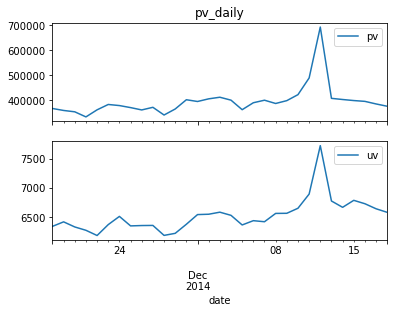

In [14]:
#pv_daily记录每天用户操作次数，uv_daily记录每天不同的上线用户数量
pv_daily=data_user.groupby('date')['user_id'].count().reset_index().rename(columns={'user_id':'pv'})
uv_daily=data_user.groupby('date')['user_id'].apply(lambda x:x.drop_duplicates().count()).reset_index().rename(columns={'user_id':'uv'})
fig,axes=plt.subplots(2,1,sharex=True)
pv_daily.plot(x='date',y='pv',ax=axes[0])
uv_daily.plot(x='date',y='uv',ax=axes[1])
axes[0].set_title('pv_daily')
plt.savefig('./PV&UV_day.png',dpi=1500)

#### 在双十二期间，pv和uv访问量达到峰值，并且可以发现，uv和pv两个访问量数值差距比较大，同时，因为数据集总人数大约是10000人左右，因此，通过nv值可以分析出双十二期间淘宝用户的日活跃大概是45%浮动。

### 6.2小时访问量分析

Text(0.5, 1.0, 'uv_hour')

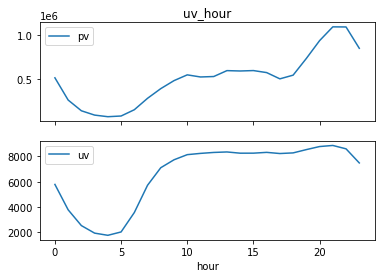

In [15]:
#pv_hour记录每小时用户操作次数，uv_hour记录每小时不同的上线用户数量
pv_hour=data_user.groupby('hour')['user_id'].count().reset_index().rename(columns={'user_id':'pv'})
uv_hour=data_user.groupby('hour')['user_id'].apply(lambda x:x.drop_duplicates().count()).reset_index().rename(columns={'user_id':'uv'})
fig,axes=plt.subplots(2,1,sharex=True)
pv_hour.plot(x='hour',y='pv',ax=axes[0])
uv_hour.plot(x='hour',y='uv',ax=axes[1])
axes[0].set_title('pv_hour')
axes[0].set_title('uv_hour')

#### 图表显示:pv和uv在凌晨0-5点期间波动情况相同，都呈下降趋势，访问量都比较小，同时在晚上18：00左右，pv波动情况比较剧烈，相比来看uv不太明显，因此晚上18：00以后是淘宝用户访问app的活跃时间段。



### 6.3 不同行为类型用户pv分析

Text(0.5, 1.0, 'pv_different_behavior_type_except1')

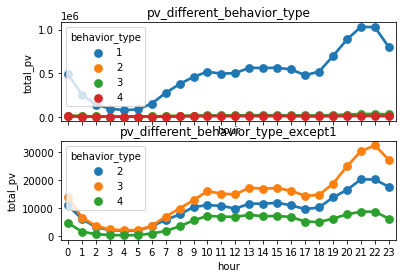

In [16]:
pv_detail=data_user.groupby(['behavior_type','hour'])['user_id'].count().reset_index().rename(columns={'user_id':'total_pv'})
fig,axes=plt.subplots(2,1,sharex=True)
sns.pointplot(x='hour',y='total_pv',hue='behavior_type',data=pv_detail,ax=axes[0])
sns.pointplot(x='hour',y='total_pv',hue='behavior_type',data=pv_detail[pv_detail.behavior_type!=1],ax=axes[1])
axes[0].set_title('pv_different_behavior_type')
axes[1].set_title('pv_different_behavior_type_except1')

#### 包含点击、收藏、加购物车、支付四种行为，分别用数字1、2、3、4表示）

#### 点击这一用户行为相比较于其他三类用户行为，pv访问量较高，同时四种用户行为的波动情况基本一致，因此晚上这一时间段不管哪一种用户行为，pv访问量都是最高的。从图2可以看出，加入购物车这一用户行为的pv总量高于收藏的总量，因此在后续漏斗流失分析中，用户行为3应该在2之前分析。

### 6.3.1 extension
#### About 漏斗分析
https://www.woshipm.com/data-analysis/4617880.html

漏斗分析在业务流程拆解和问题环节定位上具有非常重要的作用。当我们无法确定问题发生在哪个环节时，一般会通过将业务流程进行拆解，比较各个环节之间的转化率/流失率，通过这种漏斗分析的方法来定位问题原因

漏斗分析是基于业务流程的一种数据分析模型，也就是说一定是存在着业务的前因后果、前后关联关系的，它能够科学反映用户行为状态以及从起点到终点各阶段用户转化情况，进而可以定位用户流失的环节和原因。

#### 漏斗分析最常用的是转化率和流失率两个互补型指标，流失率=1-转化率。

### 常见的漏斗模型

1. AARRR
* Acquisition用户获取
* Activation用户激活
* Retention用户留存
* Revenue用户产生收入（收费用户的吸引）
* Refer自传播


2. 电商漏斗模型(in this notebook)
* 进入首页-->查看商详页-->加购物车-->支付成功
3. 功能漏斗模型
* 工具类的产品的漏斗
* eg KEEP 产品功能漏斗
* 资源推广-->用户报名-->用户达标-->用户抽奖
4. AIDMA
* 消费者行为学领域很成熟的理论模型之一
* attention注意
* interest兴趣
* Desire欲望
* Memory记忆
* Action行动


### 漏斗分析步骤
1. 快速定位问题环节
* 明摆着可优化的点，可以提升用户体验（对产品而言）；
* 迅速定位流失环节，针对性的下钻分析可以找到可优化的点，可以降低流失提升用户留存率（对运营而言）。
2. 多维度切分分析问题原因
* 各个维度对漏斗进行切分
3. 监控漏斗转化趋势迭代优化


### Eg
进入注册页-开始注册-提交验证码-注册成功
1. 定位“开始注册”-“提交验证码”环节。
2.reasons
* 是否与用户使用的平台有关？
* PC端和移动端是否有产品功能设计上的差异？
* 是否与手机平台有关？
* Android和iOS用户在这个环节是否有差异？
* 是否与浏览器有关？
* 不同浏览器在进行验证时是否有bug?
3. 在各个维度下用户的转化漏斗如何？
* Chrome浏览器的用户注册数和注册转化率较其他浏览器低很多
* 对比每一步转化，发现第一步到第二步的转化率和其他并无明显差异，而第二步到第三步的转化率非常低，大部分用户没有提交验证码，而是直接离
开了页面。
* 测试发现Chrome浏览器在获取验证码上确实存在bug，影响了用户注册，研发针对此问题进行解决后，该浏览器下的注册转化率明显提升。

# 七、用户消费行为分析

### 7.1 （1）用户购买次数情况分析

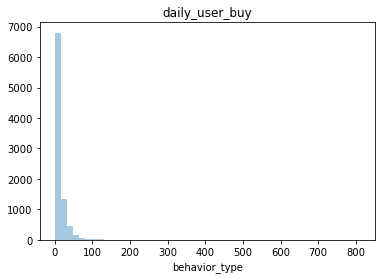

In [32]:
# 购买：行为4
# groupby 用户个人的分析（groupby user_id）
# 时间：从
data_user_buy=data_user[data_user.behavior_type==4].groupby('user_id')['behavior_type'].count()
sns.distplot(data_user_buy,kde=False)
plt.title('daily_user_buy')
plt.savefig('./daily_user_buy.png',dpi=1500)


淘宝用户消费次数普遍在10次以内，因此需要重点关注购买次数在10次以上的消费者用户群体

### 7.2 （2）日ARPPU
* ARPPU（average revenue per paying user）是指从每位付费用户身上获得的收入，它反映的是每个付费用户的平均付费额度。
* ARPPU=总收入/活跃用户付费数量
* 因为本数据集中没有消费金额，因此在计算过程中用消费次数代替消费金额
* 人均消费次数=消费总次数/消费人数

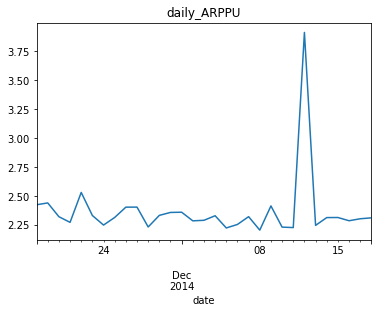

In [33]:
data_use_buy1=data_user[data_user.behavior_type==4].groupby(['date','user_id'])['behavior_type'].count().reset_index().rename(columns={'behavior_type':'total'})
data_use_buy1.groupby('date').apply(lambda x:x.total.sum()/x.total.count()).plot()
plt.title('daily_ARPPU')
plt.savefig('./daily_ARPPU.png',dpi=1500)

图表显示：平均每天消费次数在1-2次之间波动，双十二期间消费次数达到最高值。

### 7.3 （3）日ARPU
（user前缺了个paying） 
* ARPU(Average Revenue Per User) ：平均每用户收入，可通过 总收入/AU 计算得出。它可以衡量产品的盈利能力和发展活力。

* 活跃用户数平均消费次数=消费总次数/活跃用户人数(每天有操作行为的为活跃)


Text(0.5, 1.0, 'daily_ARPU')

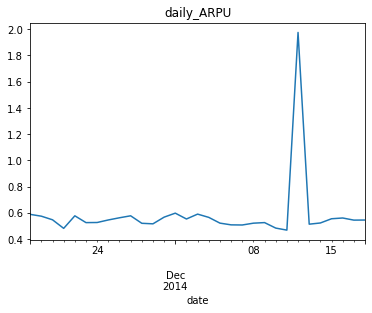

In [19]:
data_user['operation']=1
data_use_buy2=data_user.groupby(['date','user_id','behavior_type'])['operation'].count().reset_index().rename(columns={'operation':'total'})
data_use_buy2.groupby('date').apply(lambda x:x[x.behavior_type==4].total.sum()/len(x.user_id.unique())).plot()
plt.title('daily_ARPU')

### 7.4 （4）付费率

* 付费率=消费人数/活跃用户人数


Text(0.5, 1.0, 'daily_afford_rate')

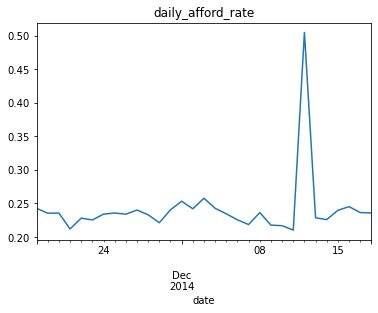

In [20]:
data_use_buy2.groupby('date').apply(lambda x:x[x.behavior_type==4].total.count()/len(x.user_id.unique())).plot()
plt.title('daily_afford_rate')


### 7.5 （5）同一时间段用户消费次数分布

大多数用户消费：1次


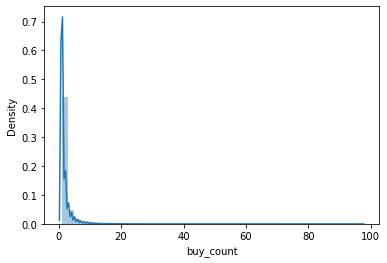

In [21]:
data_user_buy3=data_user[data_user.behavior_type==4].groupby(['user_id','date','hour'])['operation'].sum().rename('buy_count')
# 固定了date 和hour--固定那一个小时的购买量
sns.distplot(data_user_buy3)
print('大多数用户消费：{}次'.format(data_user_buy3.mode()[0]))

In [22]:
data_user_buy3[:100]
# 认清楚groupby意义

user_id  date        hour
4913     2014-12-01  23      1
         2014-12-07  22      2
         2014-12-11  18      1
         2014-12-13  18      1
         2014-12-16  12      1
                            ..
113960   2014-11-28  8       1
         2014-12-02  9       3
                     16      3
         2014-12-03  9       4
                     20      1
Name: buy_count, Length: 100, dtype: int64

# 八、复购情况分析
* 复购情况，即两天以上有购买行为,一天多次购买算一次
* 复购率=有复购行为的用户数/有购买行为的用户总数

In [23]:
date_rebuy=data_user[data_user.behavior_type==4].groupby('user_id')['date'].apply(lambda x:len(x.unique())).rename('rebuy_count')
# 用unique函数
print('复购率:',round(date_rebuy[date_rebuy>=2].count()/date_rebuy.count(),4))

复购率: 0.8717


In [24]:
#所有复购时间间隔消费次数分布
data_day_buy=data_user[data_user.behavior_type==4].groupby(['user_id','date']).operation.count().reset_index()
data_day_buy

,user_id,date,operation
0,4913,2014-12-01,1
1,4913,2014-12-07,2
2,4913,2014-12-11,1
3,4913,2014-12-13,1
4,4913,2014-12-16,1
...,...,...,...
49196,142455899,2014-11-24,1
49197,142455899,2014-11-26,2
49198,142455899,2014-11-30,1
49199,142455899,2014-12-03,1


In [25]:
# 对date做一阶差分diff（1）并排序差分值
# 对每一个days都这样做，然后再按照值加起来
data_user_buy4=data_day_buy.groupby('user_id').date.apply(lambda x:x.sort_values().diff(1).dropna())
data_user_buy4=data_user_buy4.map(lambda x:x.days)
data_user_buy4

user_id         
4913       1        6
           2        4
           3        2
           4        3
7528       7        4
                   ..
142455899  49196    2
           49197    2
           49198    4
           49199    3
           49200    1
Name: date, Length: 40315, dtype: int64

Text(0, 0.5, 'gap_count')

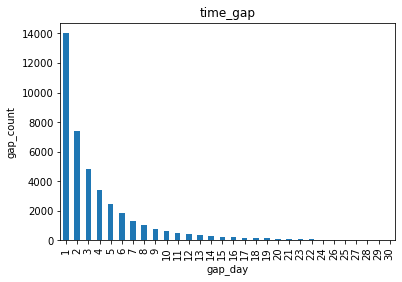

In [26]:
data_user_buy4.value_counts().plot(kind='bar')
plt.title('time_gap')
plt.xlabel('gap_day')
plt.ylabel('gap_count')

多数用户复购率为0.4693，消费次数随着消费时间间隔的增加而不断下降，在1-10天之内复购次数比较多，10天之后复购次数淘宝用户很少在进行复购，因此需要重视10天之内的淘宝用户复购行为，增加用户复购。不同用户平均复购时间呈正态分布，但是总体来看，呈现逐渐下降趋势。多数淘宝用户平均复购时间集中在1-5天时间间隔内。



# 九、漏斗流失分析
* 漏斗分析是一套流程式数据分析，它能够科学反映用户行为状态以及从起点到终点各阶段用户转化率情况的重要分析模型。

In [27]:
data_user_count=data_user.groupby(['behavior_type']).count()
data_user_count.head()

,user_id,item_id,user_geohash,item_category,time,date,hour,operation
behavior_type,,,,,,,,
1,11550581,11550581,3704666,11550581,11550581,11550581,11550581,11550581
2,242556,242556,74365,242556,242556,242556,242556,242556
3,343564,343564,104443,343564,343564,343564,343564,343564
4,120205,120205,38608,120205,120205,120205,120205,120205


In [28]:
pv_all=data_user['user_id'].count()
pv_all
# 注意count()是对这一个指标求和（比如不重复的id多少个，也就是人数）
# 然而value_counts是按值求和，也就是这一列

12256906

# 十、用户行为与商品种类关系分析

In [29]:
#不同用户行为类别的转化率
data_category=data_user[data_user.behavior_type!=2].groupby(['item_category','behavior_type']).operation.count().unstack(1).rename(columns={1:'点击量',3:'加入购物车量',4:'购买量'}).fillna(0)
data_category.head()

behavior_type,点击量,加入购物车量,购买量
item_category,,,
2,3.0,0.0,0.0
3,3.0,0.0,0.0
4,1.0,0.0,0.0
6,10.0,0.0,0.0
8,976.0,4.0,4.0


In [30]:
data_user[data_user.behavior_type!=2].groupby(['item_category','behavior_type']).operation.count()

item_category  behavior_type
2              1                    3
3              1                    3
4              1                    1
6              1                   10
8              1                  976
                                ...  
14079          1                93007
               3                 2515
               4                  479
14080          1                   86
               3                    1
Name: operation, Length: 19012, dtype: int64

In [31]:
#不同用户行为类别的转化率
data_category=data_user[data_user.behavior_type!=2].groupby(['item_category','behavior_type']).operation.count().unstack(1).rename(columns={1:'点击量',3:'加入购物车量',4:'购买量'}).fillna(0)
data_category.head()

behavior_type,点击量,加入购物车量,购买量
item_category,,,
2,3.0,0.0,0.0
3,3.0,0.0,0.0
4,1.0,0.0,0.0
6,10.0,0.0,0.0
8,976.0,4.0,4.0
